In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('../../data/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='HouseAge', ylabel='MedHouseVal'>

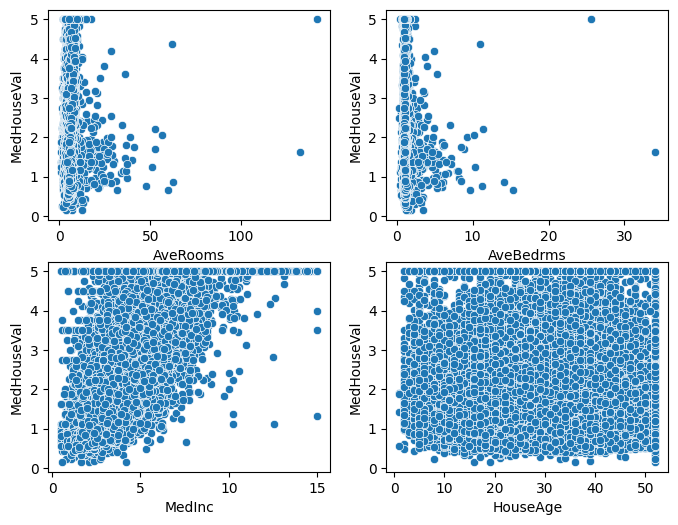

In [9]:
_, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.scatterplot(df, x='AveRooms', y='MedHouseVal', ax=axes[0, 0])
sns.scatterplot(df, x='AveBedrms', y='MedHouseVal', ax=axes[0, 1])
sns.scatterplot(df, x='MedInc', y='MedHouseVal', ax=axes[1, 0])
sns.scatterplot(df, x='HouseAge', y='MedHouseVal', ax=axes[1, 1])

In [10]:
df['log_ave_rooms'] = np.log(df['AveRooms'])
df['log_ave_bedrms'] = np.log(df['AveBedrms'])

<Axes: xlabel='log_ave_bedrms', ylabel='MedHouseVal'>

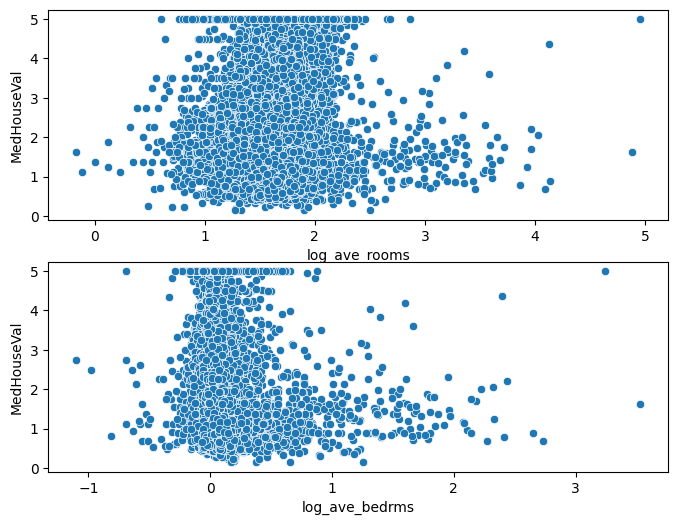

In [12]:
_, axes = plt.subplots(2, 1, figsize=(8, 6))

sns.scatterplot(df, x='log_ave_rooms', y='MedHouseVal', ax=axes[0])
sns.scatterplot(df, x='log_ave_bedrms', y='MedHouseVal', ax=axes[1])

<Axes: xlabel='Longitude', ylabel='Latitude'>

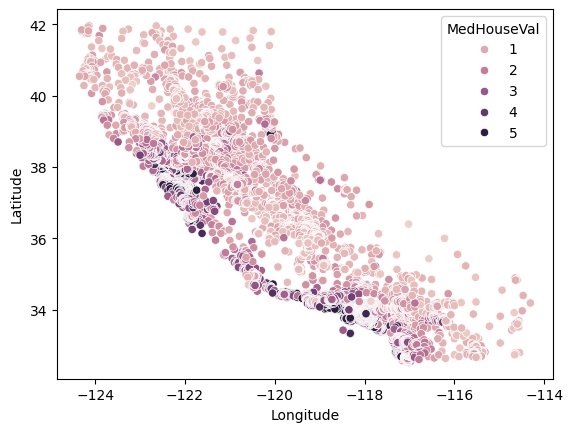

In [13]:
sns.scatterplot(df, x='Longitude', y='Latitude', hue='MedHouseVal')

In [15]:
pca = PCA(n_components=1)
df['latlong'] = pca.fit_transform(df[['Latitude', 'Longitude']])

<Axes: xlabel='latlong', ylabel='MedHouseVal'>

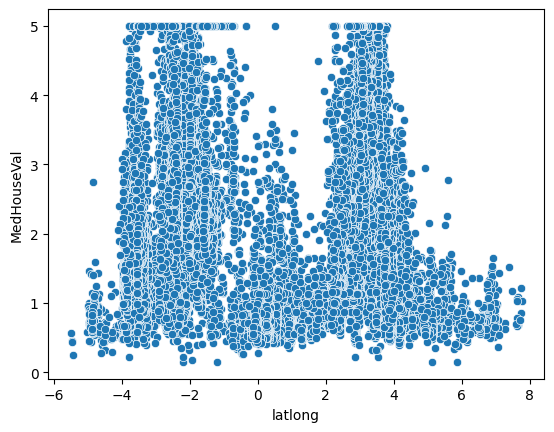

In [16]:
sns.scatterplot(df, x='latlong', y='MedHouseVal')

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import cross_validate

In [49]:
model = make_pipeline(StandardScaler(), LinearRegression())
cv_results = cross_validate(LinearRegression(), df[['MedInc']], df['MedHouseVal'], return_estimator=True, n_jobs=2)

In [50]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.421 ± 0.084
